**Tweet Sentiment Analizing**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
twitts_train = pd.read_csv('dataset/twitter_training.csv')
twitts_valid = pd.read_csv('dataset/twitter_validation.csv')
twitts_valid.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


We need to add name for each column

We also need to add the 2 df to 1

In [4]:
column_name=['tweetID','entity','sentiment','tweet_content']
twitts_train.columns=column_name
twitts_valid.columns=column_name
twitts=pd.concat([twitts_train,twitts_valid],ignore_index=False)
twitts.head()

,tweetID,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
twitts.columns.tolist()

['tweetID', 'entity', 'sentiment', 'tweet_content']

In [6]:
twitts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75680 entries, 0 to 998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweetID        75680 non-null  int64 
 1   entity         75680 non-null  object
 2   sentiment      75680 non-null  object
 3   tweet_content  74994 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


**Cleaning Data**

In [7]:
twitts.isnull().sum()

tweetID            0
entity             0
sentiment          0
tweet_content    686
dtype: int64

In [8]:
twitts.duplicated().sum()

np.int64(3216)

We need to remove all null and duplicated values

In [9]:
twitts.dropna(inplace=True)
twitts.drop_duplicates(inplace=True)
print("null values:","\n",twitts.isnull().sum())
print("duplicated values:",twitts.duplicated().sum())

null values: 
 tweetID          0
entity           0
sentiment        0
tweet_content    0
dtype: int64
duplicated values: 0


**Drop not needed columns**

In [10]:
twitts.drop(columns=['tweetID','tweet_content'],inplace=True)
twitts.head()

,entity,sentiment
0,Borderlands,Positive
1,Borderlands,Positive
2,Borderlands,Positive
3,Borderlands,Positive
4,Borderlands,Positive


In [11]:
twitts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72138 entries, 0 to 995
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   entity     72138 non-null  object
 1   sentiment  72138 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


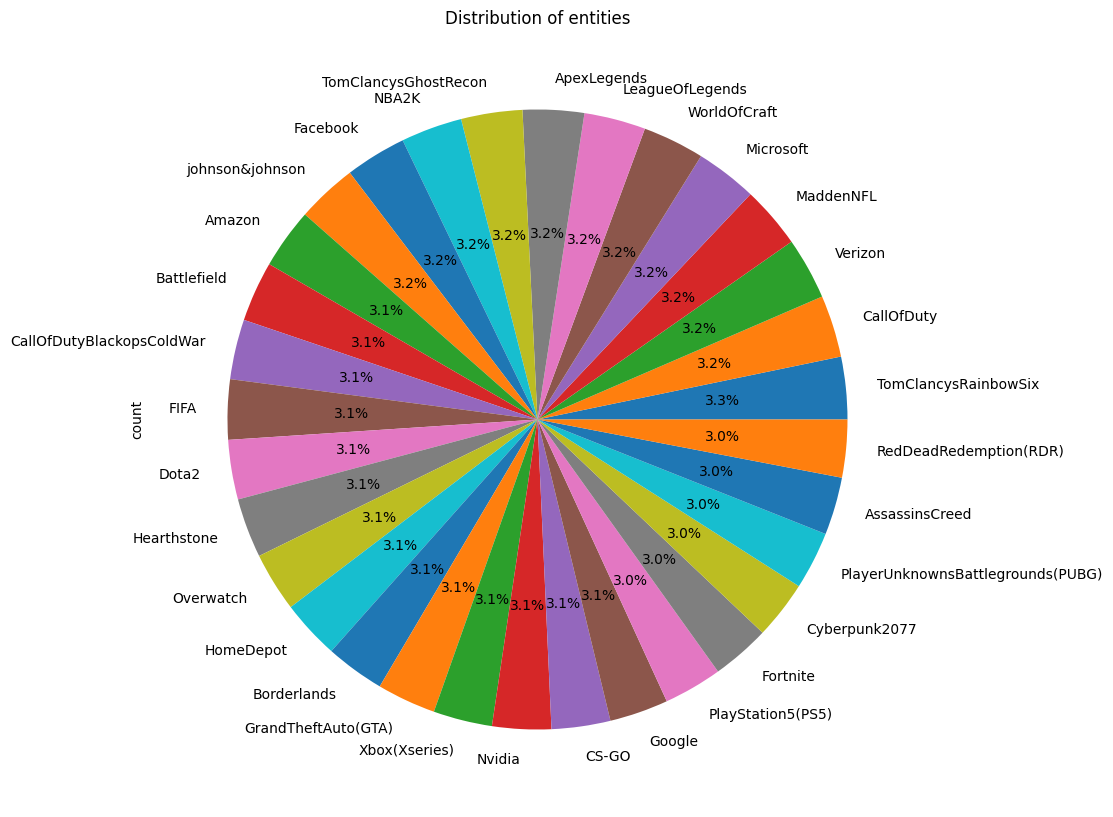

In [12]:
entity_content=twitts['entity'].value_counts()
entity_content.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 12))
plt.title('Distribution of entities')

plt.show()

We can see that all entities are mostly equals

<Axes: xlabel='sentiment'>

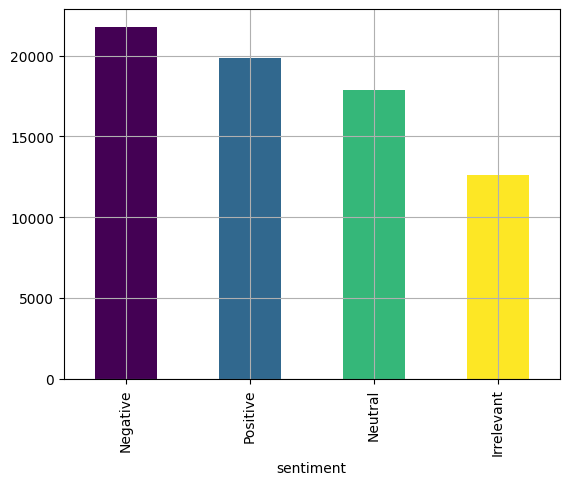

In [13]:
sentiment_content=twitts['sentiment'].value_counts()
color=plt.get_cmap('viridis')
colors = [color(i) for i in np.linspace(0, 1, len(sentiment_content))]
sentiment_content.plot(kind='bar',color=colors,grid=True)

- We can see that negative is above 20000 (not surprising from Twitter haha)
- The less number of reactions are irrelevant (~13000)

<Axes: xlabel='entity'>

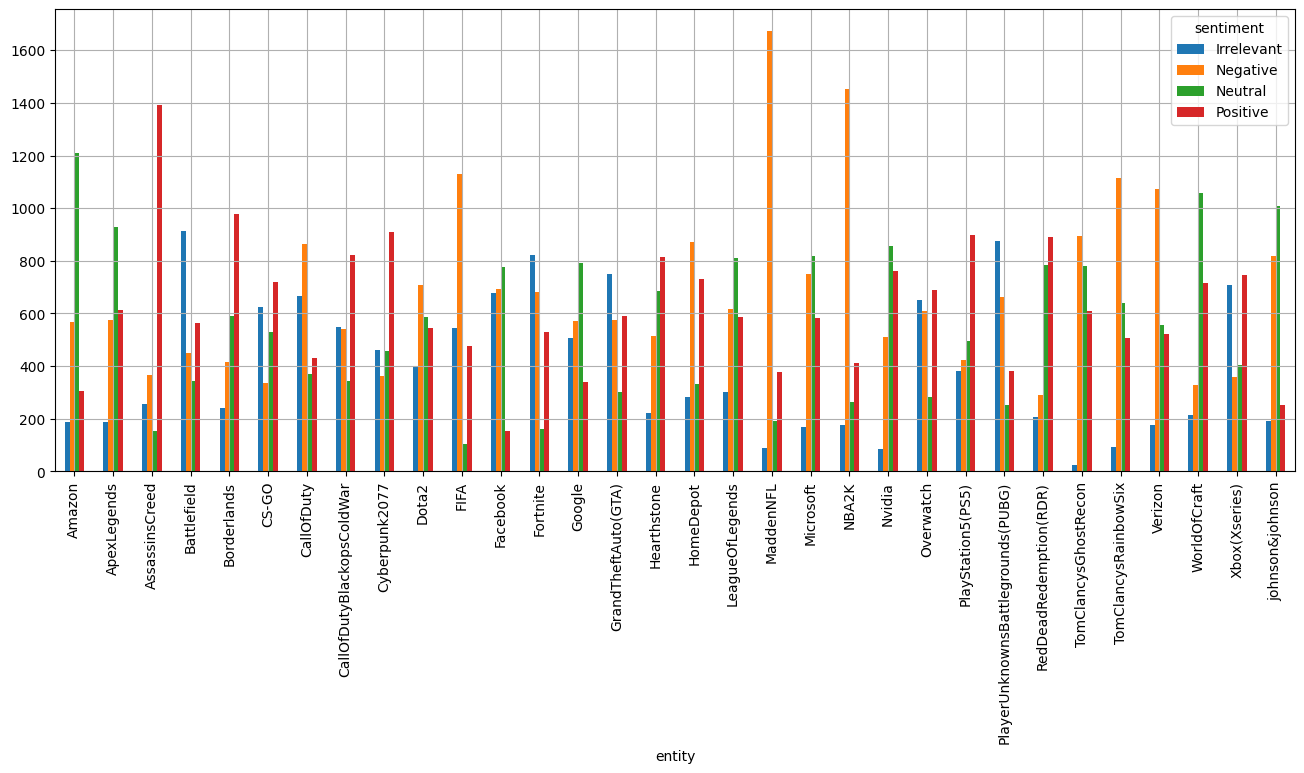

In [14]:
reactions_entities = pd.crosstab(twitts['entity'],twitts['sentiment'])
reactions_entities.plot(kind='bar', figsize=(16, 6),grid=True)

- The highest negative reactions are from MaddenNFL
- The highest irrelevant reactions are from Battlefield
- The highest neutral reactions are from the Amazon entity
- The highest positive reactions are from the Assassin's Creed entity

**2. Prediction**